In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Define the path to the Excel file
file_path = r"C:\Users\nages\Downloads\Prediction_Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'churn_db vw_churndata'

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name = sheet_name)

# Display the first few rows of the fetched data
print(data.head())


  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                27        NaN           Yes             No  ...   
1                13        NaN           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card           65.6        593.30          0.00   
1      Credit Card          

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Drop unnecessary columns (ignore if not found)
data = data.drop(columns=['Customer_ID', 'Churn_Category', 'Churn_Reason'], errors='ignore')

# Fill missing values for encoding
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

data[columns_to_encode] = data[columns_to_encode].fillna('Missing')

# Apply Label Encoding
label_encoders = {} 
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Filter and encode target
data = data[data['Customer_Status'].isin(['Stayed', 'Churned'])]  # Optional, if 'Joined' exists
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Train-test split
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)



In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=69)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=69)

Confusion Matrix:
[[821  59]
 [131 191]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       880
           1       0.76      0.59      0.67       322

    accuracy                           0.84      1202
   macro avg       0.81      0.76      0.78      1202
weighted avg       0.84      0.84      0.84      1202



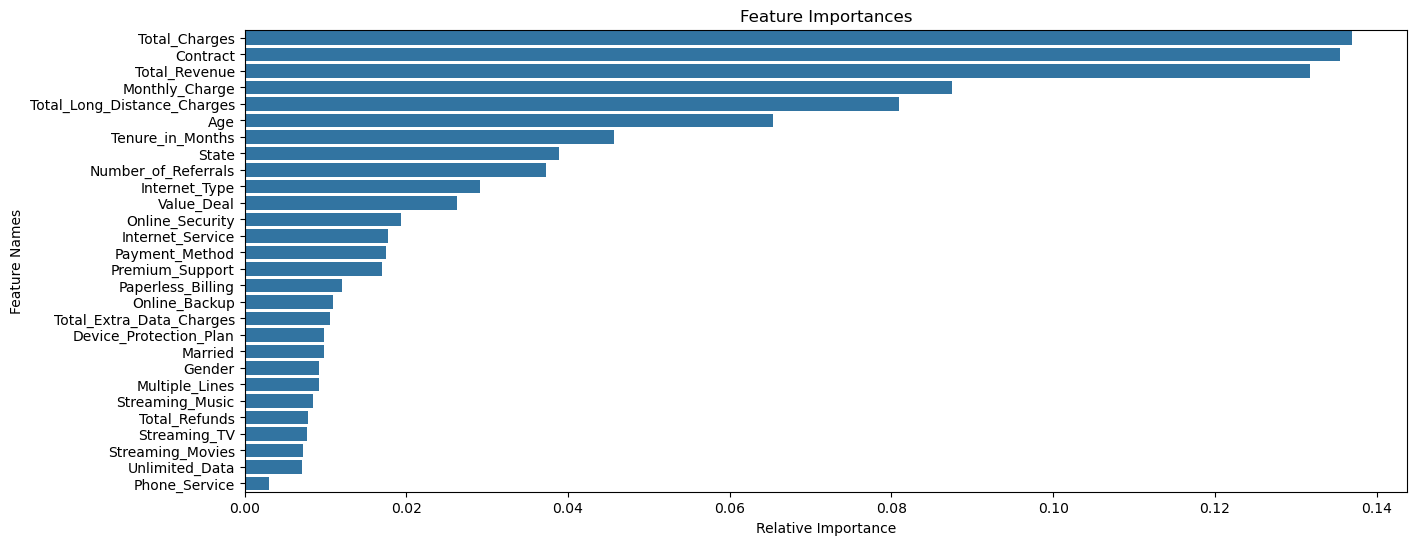

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [ ]:
import pandas as pd

# Path to the new Excel data
file_path = r"C:\Users\nages\Downloads\Prediction_Data.xlsx"
sheet_name = 'churn_db vw_joindata'

# Load the data
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Retain original data for output
original_data = new_data.copy()

# Extract Customer_IDs for reference
customer_ids = new_data['Customer_ID']

# Drop non-feature columns safely
columns_to_drop = ['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason']
new_data = new_data.drop(columns=[col for col in columns_to_drop if col in new_data.columns], errors='ignore')

# Fill missing values if any, before transforming
new_data.fillna('Missing', inplace=True)

# Apply saved label encoders safely
for column in new_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        try:
            new_data[column] = label_encoders[column].transform(new_data[column])
        except ValueError as e:
            print(f"Error transforming column '{column}': {e}")
            # Optional: handle unseen categories here
            new_data[column] = new_data[column].apply(
                lambda x: label_encoders[column].transform([x])[0] if x in label_encoders[column].classes_ else -1
            )
    else:
        print(f"Warning: No label encoder found for column '{column}'")

# Make predictions using the trained model (make sure rf_model is loaded)
new_predictions = rf_model.predict(new_data)

# Append prediction results to original data
original_data['Customer_Status_Predicted'] = new_predictions

# Filter to only customers predicted as "Churned" (class = 1)
churned_customers = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save churned customer predictions to CSV
churned_customers.to_csv(r"C:\Users\nages\Downloads\Predictions.csv", index=False)



In [ ]:
# Define the path to the Joiner Data Excel file
file_path = r"C:\yourpath\Prediction_Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_JoinData'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"C:\yourpath\Predictions.csv", index=False)
